# Imports

In [1]:
import numpy as np
import pandas as pd
from random import shuffle, seed
from tqdm import tqdm
import pickle
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
def pickling(obj, fname):
    # Function to pickle an object to a file
    f = open(fname, 'wb')
    f.write(pickle.dumps(obj))
    f.close()

In [3]:
def unpickling(fname):
    # Function to unpicle an object from fname
    f = open(fname, 'rb')
    x = pickle.load(f)
    return x

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

In [5]:
# data = pd.read_csv('./drive/My Drive/ML Project/cleaned_data.csv', na_values='.')
# X = []
# Y = []
# for i in tqdm(range(len(data['isbn']))):
#   Y.append(data['rating'][i])
#   X.append(np.array(Image.open("/content/drive/My Drive/ML Project/imagesSmall/" + data['isbn'][i])))

In [6]:
# pickling(X, "./drive/My Drive/ML Project/ImagesX.pkl")
# pickling(Y, "./drive/My Drive/ML Project/ImagesY.pkl")

In [7]:
# temp = unpickling("./drive/My Drive/ML Project/ImagesX.pkl")
# len(temp)

In [8]:
# im = Image.fromarray(temp[0], 'RGB')
# im.save('check.png')

In [9]:
# preprocessed = []
# for i in tqdm(range(len(temp))):
#   temp2 = np.ndarray((102, 50, 3))
#   # print(temp[i].shape)
#   im = Image.fromarray(temp[i]).convert('RGB')
#   temp1 = np.array(im)
#   temp2[:temp1.shape[0], :temp1.shape[1], :temp1.shape[2]] = temp1
#   preprocessed.append(temp2)
# # preprocessed = np.array(preprocessed)
# # np.shape(preprocessed)
# # np.shape(preprocessed[0])

In [10]:
# def add_margin(pil_img, top, right, bottom, left, color):
#     width, height = pil_img.size
#     new_width = width + right + left
#     new_height = height + top + bottom
#     result = Image.new(pil_img.mode, (new_width, new_height), color)
#     result.paste(pil_img, (left, top))
#     return result

In [11]:
# preprocessed = []
# for i in tqdm(range(len(temp))):
#   im = Image.fromarray(temp[i]).convert('RGB')
#   temp1 = np.array(im)
#   newImg = add_margin(im, 0, 0, 102 - temp1.shape[0], 0, (0, 0, 0))
#   preprocessed.append(np.array(newImg))

In [12]:
# print(len(preprocessed))
# print(np.shape(preprocessed[5000]))

In [13]:
# pickling(preprocessed, "./drive/My Drive/ML Project/ImagesPreprocessedX2.pkl")

In [14]:
X_pickle = unpickling("./drive/My Drive/ML Project/data/ImagesPreprocessedX2.pkl") # List of Numpy Arrays (102 X 50 X 3)
Y_pickle = unpickling("./drive/My Drive/ML Project/data/ImagesY.pkl")

In [15]:
new_X = []
new_Y = []
for i in range(len(X_pickle)):
    x = X_pickle[i]
    if x.shape == (102, 50, 3):
        new_X.append(x/255)
        new_Y.append(Y_pickle[i])
# new_X /= 255
# new_Y /= 255

In [16]:
def remove_samples(X_train, y_train):
    remove = 10000
    added = []
    for i in range(X_train.shape[0]):
        if y_train[i] > 3.8 and y_train[i] < 4.2 and remove:
            remove -= 1
        else:
            added.append(i)

    X_train_new = np.ndarray((len(added), X_train.shape[1]))
    y_train_new = np.ndarray((len(added)))

    for i in range(len(added)):
        X_train_new[i] = X_train[added[i]]
        y_train_new[i] = y_train[added[i]]

    return X_train_new, y_train_new

# Models

## CNN

In [17]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from sklearn.model_selection import train_test_split

In [18]:
def model(input_shape):
    X_input = Input(input_shape)
    
    X = Conv2D(6, (2, 2), name = 'conv0')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('elu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    X = Flatten()(X)
    X = Dense(1, name='fc')(X)

    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

X = np.ndarray((len(new_X), 102, 50, 3))
for i in range(len(new_X)):
    X[i] = new_X[i]
Y = np.array(new_Y).reshape((len(new_Y), 1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
nn = model(X[0].shape)
nn.compile(optimizer = "adam", loss = "mse", metrics = ["mse"])
nn.fit(x = X_train, y = y_train, epochs = 20, batch_size = 32)
nn.evaluate(x = X_test, y = y_test)



Epoch 1/20
476/476 [==============================] - 43s 89ms/step - loss: 0.7096 - mse: 0.7096
Epoch 2/20
476/476 [==============================] - 42s 88ms/step - loss: 0.2748 - mse: 0.2748
Epoch 3/20
476/476 [==============================] - 42s 89ms/step - loss: 0.2384 - mse: 0.2384
Epoch 4/20
476/476 [==============================] - 42s 88ms/step - loss: 0.2301 - mse: 0.2301
Epoch 5/20
476/476 [==============================] - 42s 88ms/step - loss: 0.1933 - mse: 0.1933
Epoch 6/20
476/476 [==============================] - 42s 89ms/step - loss: 0.1608 - mse: 0.1608
Epoch 7/20
476/476 [==============================] - 42s 88ms/step - loss: 0.2067 - mse: 0.2067
Epoch 8/20
476/476 [==============================] - 43s 89ms/step - loss: 0.1528 - mse: 0.1528
Epoch 9/20
476/476 [==============================] - 42s 88ms/step - loss: 0.1651 - mse: 0.1651
Epoch 10/20
476/476 [==============================] - 42s 89ms/step - loss: 0.1591 - mse: 0.1591
Epoch 11/20
476/476 [========

NameError: ignored

In [20]:


weights = nn.get_weights()
pickle.dump(weights, open('./drive/My Drive/ML Project/weights/BookCoverCNN.sav', 'wb'))
weights = pickle.load(open('./drive/My Drive/ML Project/weights/BookCoverCNN.sav', 'rb'))
nn = model(X[0].shape)
nn.compile(optimizer = "adam", loss = "mse", metrics = ["mse"])
nn.set_weights(weights)
y_hat = nn.predict(X)
print(mean_squared_error(y_hat, Y))

0.15626476476988813


<Figure size 432x288 with 0 Axes>

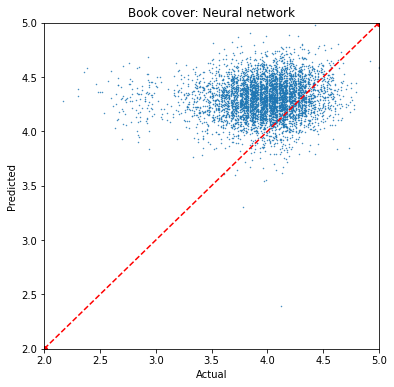

In [ ]:
plt.clf()
fig, ((ax1)) = plt.subplots(1, 1)
y_hat_test = nn.predict(X_test)
ax1.set_title('Book cover: Neural network')
ax1.scatter(y_test, y_hat_test, s = 0.2)
ax1.plot((2, 5), (2, 5), 'ro--')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_xlim(2, 5)
ax1.set_ylim(2, 5)
fig.set_size_inches(6, 6)

In [ ]:
fig.set_size_inches(6, 6)

## ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

def model(input_shape):
    X_input = Input(input_shape)
    X = Dense(512, activation='elu')(X_input)
    X = Dense(256, activation='elu')(X)
    X = Dense(128, activation='elu')(X)
    X = Dense(64, activation='elu')(X)
    X = Dense(32, activation='elu')(X)
    X = Dense(16, activation= 'elu')(X)
    X = Dense(8, activation= 'elu')(X)
    X = Dense(1)(X)
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

X = np.ndarray((len(new_X), 102, 50, 3))

for i in range(len(new_X)):
    X[i] = new_X[i]
Y = np.array(new_Y).reshape((len(new_Y), 1))

X = np.asarray(X).astype('float64').reshape((X.shape[0], X.shape[1] * X.shape[2] * X.shape[3]))
Y = np.asarray(Y).astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=5, shuffle = True)

X_train, y_train = remove_samples(X_train, y_train)
happyModel = model(X[0].shape)
happyModel.compile(optimizer='adam', loss = "mse", metrics = ["mse"])
happyModel.fit(x = X_train, y = y_train, epochs = 50, batch_size=50)

loss, acc = happyModel.evaluate(x = X_test, y = y_test)


weights = happyModel.get_weights()
pickle.dump(weights, open('./drive/My Drive/ML Project/weights/BookCoverANN.sav', 'wb'))
weights = pickle.load(open('./drive/My Drive/ML Project/weights/BookCoverANN.sav', 'rb'))
happyModel = model((X.shape[1]))
happyModel.compile(optimizer = 'adam', loss = "mse", metrics = ["mse"])
happyModel.set_weights(weights)
y_hat = happyModel.predict(X)


In [21]:
print(mean_squared_error(y_hat, Y))

0.17769400621957926


In [ ]:
from sklearn.model_selection import train_test_split
def mean_squared_error(y, y_hat):
    return sum((y_hat - y)**2 * (abs(3.97 - y) + 1))/y.shape[0]

X = np.ndarray((len(new_X), 102, 50, 3))

for i in range(len(new_X)):
    X[i] = new_X[i]
Y = np.array(new_Y).reshape((len(new_Y), 1))

X = np.asarray(X).astype('float64').reshape((X.shape[0], X.shape[1] * X.shape[2] * X.shape[3]))
Y = np.asarray(Y).astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

    
y_pred = [3.97] * len(y_train)
y_pred = np.array(y_pred).reshape((len(y_train), 1))
print(mean_squared_error(y_train, y_pred))


[0.2018129]


## Alexnet

In [ ]:
import torch
import numpy as np
import pickle
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torchvision import transforms
import random
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm
model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
X = np.ndarray((len(new_X), 102, 50, 3))
for i in range(len(new_X)):
    X[i] = new_X[i]
Y = np.array(new_Y).reshape((len(new_Y), 1))

In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

X = torch.tensor(X)
X_alex = torch.tensor([])
X_alex = X_alex.to('cuda')
for i in tqdm(X):
    input_tensor = transform(i)
    input_batch = input_tensor.unsqueeze(0)
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')
    with torch.no_grad():
        output = model(input_batch)
    X_alex = torch.cat((X_alex, output[0].reshape((1, 1000))), 0)

In [ ]:
pickling(X_alex, "./drive/My Drive/ML Project/data/alex_X.pkl") 
pickling(Y, "./drive/My Drive/ML Project/data/alex_Y.pkl")



X_alex = unpickling("./drive/My Drive/ML Project/data/alex_X.pkl")
X_alex = unpickling("./drive/My Drive/ML Project/data/alex_X.pkl")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_alex, Y, random_state=5, shuffle = True)
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)


X_train = X_train.to('cuda')
X_test = X_test.to('cuda')
y_train = y_train.to('cuda')
y_test = y_test.to('cuda')



X_train = X_train.float()
X_test = X_test.float()
y_train = y_train.float()
y_test = y_test.float()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [ ]:
clf = nn.Sequential(nn.Linear(X_train.shape[1], 1024), 
                    nn.Tanh(),
                    nn.Linear(1024, 512),
                    nn.ReLU(),
                    nn.Linear(512, 256),
                    nn.Tanh(),
                    nn.Linear(256, 128),
                    nn.ReLU(),
                    nn.Linear(128, 64),
                    nn.Tanh(),
                    nn.Linear(64, 32),
                    nn.ReLU(),
                    nn.Linear(32, 8),
                    nn.ReLU(),
                    nn.Linear(8, 1),
                    )
clf.to('cuda')
optimizer = optim.Adam(clf.parameters(),lr=0.1)
criterion = nn.MSELoss()

for i in range(500):
    optimizer.zero_grad()
    y_pred = clf(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()


In [ ]:
y_pred = clf(X_train)
loss = criterion(y_pred, y_train)
print(loss.item())

0.1150154322385788


In [ ]:
y_hat = (clf(X_test))
loss = criterion(y_hat, y_test)
print(loss.item())

0.11545713990926743
